### TALLER PRACTIVO: REGRESION LINEAL CON ARBOL DE DECISION

Hecho por: Juan David Echeverria Garcia

#### Ejercicio 1 - Prediccion del cosnumo de combustible (Dataset: autos.csv)

In [ ]:
# Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

1. Carga y Exloracion de datos

In [ ]:
df = pd.read_csv('autos.csv')
df.head()

,cilindrada,peso_kg,potencia_hp,consumo_km_l
0,1300,950,75,17.2
1,1500,1100,90,15.4
2,1600,1200,100,14.1
3,1800,1250,110,13.6
4,2000,1300,120,12.8


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cilindrada    20 non-null     int64  
 1   peso_kg       20 non-null     int64  
 2   potencia_hp   20 non-null     int64  
 3   consumo_km_l  20 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 772.0 bytes


,cilindrada,peso_kg,potencia_hp,consumo_km_l
count,20.000000,20.000000,20.000000,20.000000
mean,1875.000000,1254.000000,112.000000,13.465000
std,386.448063,161.812107,23.192558,1.867527
min,1300.000000,950.000000,70.000000,10.800000
25%,1600.000000,1165.000000,95.000000,12.125000
50%,1800.000000,1270.000000,112.500000,13.250000
75%,2200.000000,1357.500000,130.000000,14.550000
max,2500.000000,1500.000000,150.000000,17.200000


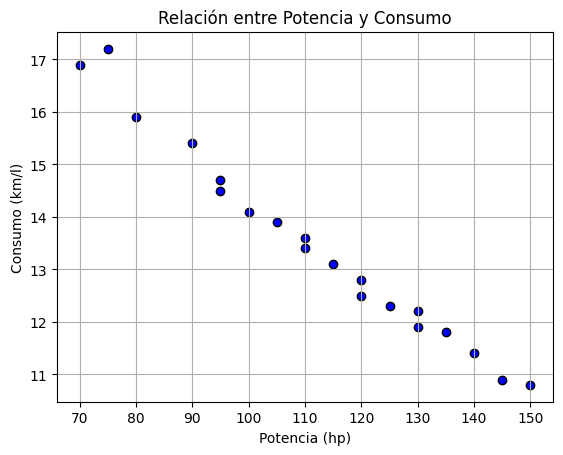

In [ ]:
# Grafico de dispersion entre potencia_hp y consumo_km_l
plt.scatter(df['potencia_hp'], df['consumo_km_l'], color = "blue", edgecolor = "black")
plt.xlabel('Potencia (hp)')
plt.ylabel('Consumo (km/l)')
plt.title('Relación entre Potencia y Consumo')
plt.grid(True)
plt.show()

Se puede evidenciar que a medida que la potencia del auto aumenta su consumo por kilometro disminuye, esto significaria que un motor con mayor potencia consume mas gasolina en menos kilometros que uno de menor potecnia.

2. Preparacion del modelo

In [ ]:
# dividir datos de entrenamiento y testeo
x = df[["cilindrada", "peso_kg", "potencia_hp"]]
y = df["consumo_km_l"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# creacion del modelo
modelo = DecisionTreeRegressor(max_depth=4)
modelo.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

3. Evaluacion

In [ ]:
# calcular MSE y R2
y_pred = modelo.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.17750000000000052
R2: 0.9380453752181499


Segun los resultados de evaluacion MSE y R2, se evidencia que el error cuadratico medio es muy bajo y el coeficiente es bastante alto un 93% de acertividad lo que sugiere que el modelo hizo una prediccion bastante precisa del cosnumo.

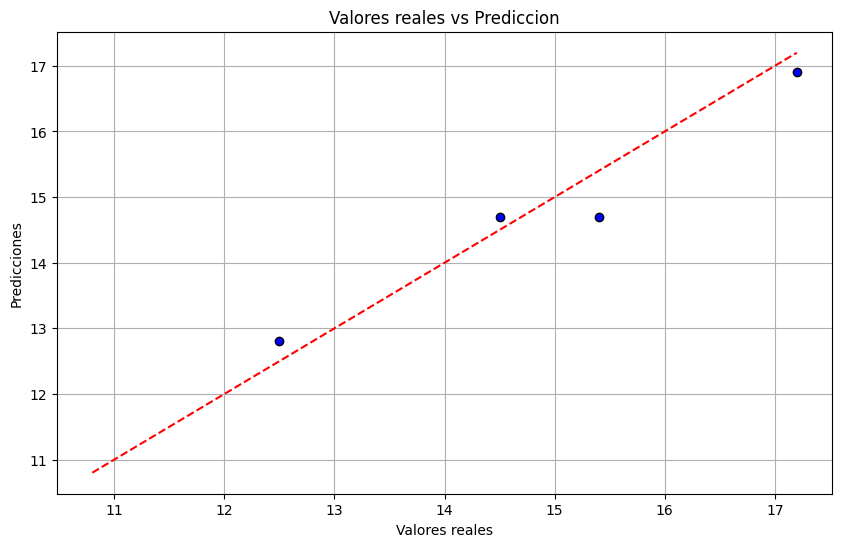

In [ ]:
# grafica valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = "blue", edgecolor = "black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Prediccion')
plt.grid(True)

4. Analisis del arbol

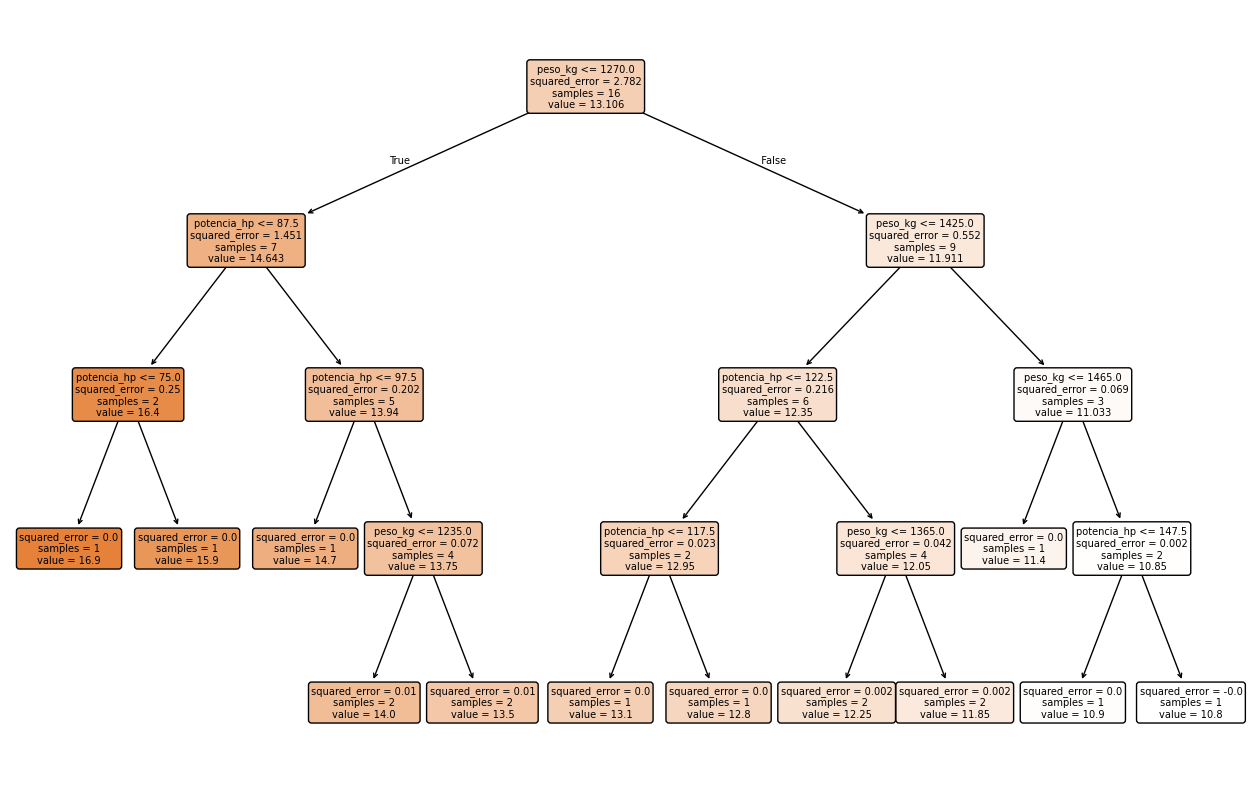

In [ ]:
# arbol con plot_tree
plt.figure(figsize=(16, 10))
plot_tree(modelo, feature_names = x.columns, filled=True, rounded=True)
plt.show()

5. Prediccion nueva

In [ ]:
nuevo_auto = pd.DataFrame({
    "cilindrada": [1600],
    "peso_kg": [1200],
    "potencia_hp": [105]
})
prediccion = modelo.predict(nuevo_auto)
print(f"El consumo del auto es de {prediccion[0]} km_l")

El consumo del auto es de 14.0 km_l


6. conclusion breve:
- el valor obtenido fue bastante acertado, comparandolo con el dataset y uno de sus consumos que es bastante similar, variando la potencia un poco, se ve como el consumo por kilometraje disminuye.

#### Ejercicio 2 - Estimacion de salarios segun experiencia

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

1. Analisis incial

In [ ]:
df = pd.read_csv("salarios.csv")
df.head(20)

,experiencia_anios,nivel_educativo,horas_semana,salario_usd
0,1,1,38,18000
1,2,1,40,19000
2,3,2,42,22000
3,4,2,44,25000
4,5,2,45,28000
5,6,3,46,35000
6,7,3,48,38000
7,8,3,50,41000
8,9,3,52,44000
9,10,3,54,46000


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   experiencia_anios  20 non-null     int64
 1   nivel_educativo    20 non-null     int64
 2   horas_semana       20 non-null     int64
 3   salario_usd        20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes


,experiencia_anios,nivel_educativo,horas_semana,salario_usd
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,3.050000,55.000000,45950.000000
std,5.91608,0.998683,10.607842,17270.220795
min,1.00000,1.000000,38.000000,18000.000000
25%,5.75000,2.750000,45.750000,33250.000000
50%,10.50000,3.000000,55.000000,47000.000000
75%,15.25000,4.000000,64.250000,60500.000000
max,20.00000,4.000000,72.000000,71000.000000


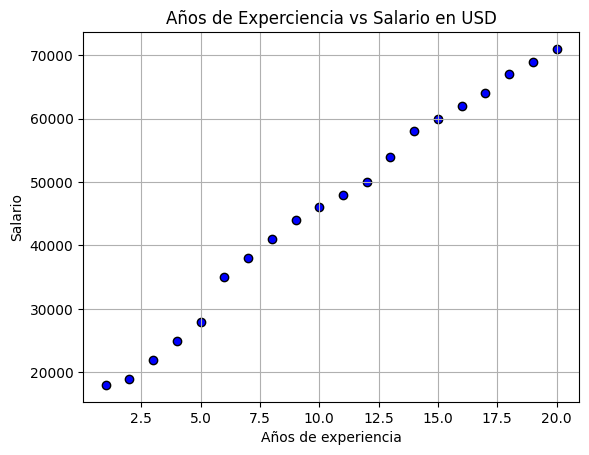

In [ ]:
# Grafico
plt.scatter(df['experiencia_anios'], df['salario_usd'], color = "blue", edgecolor = "black")
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title("Años de Experciencia vs Salario en USD")
plt.grid(True)
plt.show()

Segun la grafica se puede observar que mientras mas años de experiencia se tenga el salario va a ser mayor, siendo casi proporcional.

2. Entrenamiento del modelo

In [ ]:
x = df[["experiencia_anios", "nivel_educativo", "horas_semana"]]
y = df["salario_usd"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
modelo = DecisionTreeRegressor( max_depth=5)
modelo.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

3. Evaluacion

In [ ]:
y_pred = modelo.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  9500000.0
R2:  0.982151244715829


frente al mse se podria decir que esta reltivamente bien pues es un error mediatico pequeño en comparacion al rango total de los salarios. Mientras el R2 esta en un 98% de variabilidad en funcion de las variables.

In [ ]:
r2_train = modelo.score(x_train, y_train)
r2_test = modelo.score(x_test, y_test)
print("R2 en entrenamiento:", r2_train)
print("R2 en prueba:", r2_test)

R² en entrenamiento: 1.0
R² en prueba: 0.982151244715829


No existe un sobreajuste muy evidente en R2 si bien el entrenamiento es mayor, no es mucho mayor por lo que en este caso el modelo puede generalizar bien.

4. Importancia de variables

In [ ]:
# tabla con importancia de cada variable
importancia = pd.DataFrame({
    "Variable": x.columns,
    "Importancia": modelo.feature_importances_
}).sort_values(by="Importancia", ascending=False)

# 6️⃣ Mostrar tabla
print(importancia)

            Variable  Importancia
2       horas_semana     0.740547
0  experiencia_anios     0.259453
1    nivel_educativo     0.000000


La variable que mayor influencia tiene frente a la prediccion del salario es horas_semana su importancia es del 0.74 es decir un 74%, en el arbol de decision, la importancia se calcula en cuanto reduce la impureza, o varianza en este caso, un valor de importancia alta siginica que fue utilizada con mayor frecuencia de fue mas efectiva para hacer divisiones en nodos mas "puros".

5. Prediccion

In [ ]:
nuevo_salario = pd.DataFrame({
    "experiencia_anios": [7],
    "nivel_educativo": [3],
    "horas_semana": [45]
})

prediccion = modelo.predict(nuevo_salario)
print(f"El salario estimado es de {prediccion[0]} USD")

El salario estimado es de 38000.0 USD


6. conclusion


*   El modelo apesar de trabajar un conjunto de datos pequeño, se pudo realizar una evaluacion muy acertada para predecir futuros datos, como en el nuevo salario podemos ver que da el mismo salario, aun con una pequeña diferencia en las horas semanales, lo que concluye que el salario varia con una gran diferencia en alguna variable.



#### Ejercicio 3 - Prediccion de temperatura maxima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

1. Carga y analisis

In [ ]:
df = pd.read_csv("clima.csv")
df.head()

,humedad,altitud_m,velocidad_viento,temp_max_c
0,60,100,5,32.1
1,65,150,6,31.5
2,70,200,8,30.7
3,75,300,9,29.9
4,80,400,10,29.0


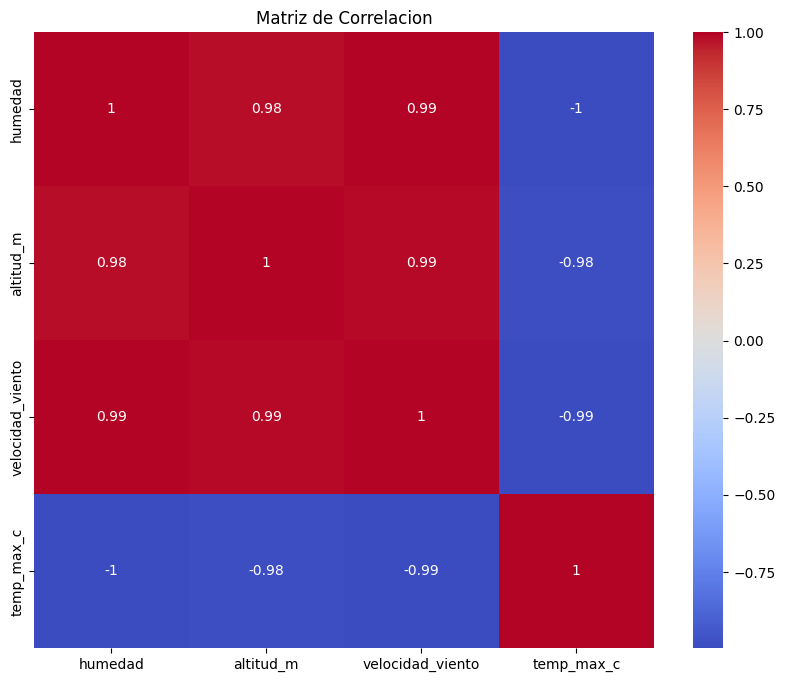

In [ ]:
# grafico de correlacion entre variables
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()

- Se puede ver que hay una correlacion negativa entre temp_max_c y las otras variables, esto quiere decir que a medidad que la humedad, velocidad de viento y altitud aumentan la temperatura disminuye, el resto de variables muestran una fuerte correlacion positiva entre si acercandose a 1.

2. Entrenamiento del modelo

In [ ]:
x = df[["humedad", "velocidad_viento", "altitud_m"]]
y = df["temp_max_c"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
modelo = DecisionTreeRegressor(max_depth=6)
modelo.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

3. Evaluacion

In [ ]:
# MSE y R2
y_pred = modelo.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.037499999999999825
R2:  0.9371727748691101


- Variar el max_depth cambia la precision y el error cuadratico medio, en este caso aumentandolo a 6 muestra una prediccion muy acertada un 93%.

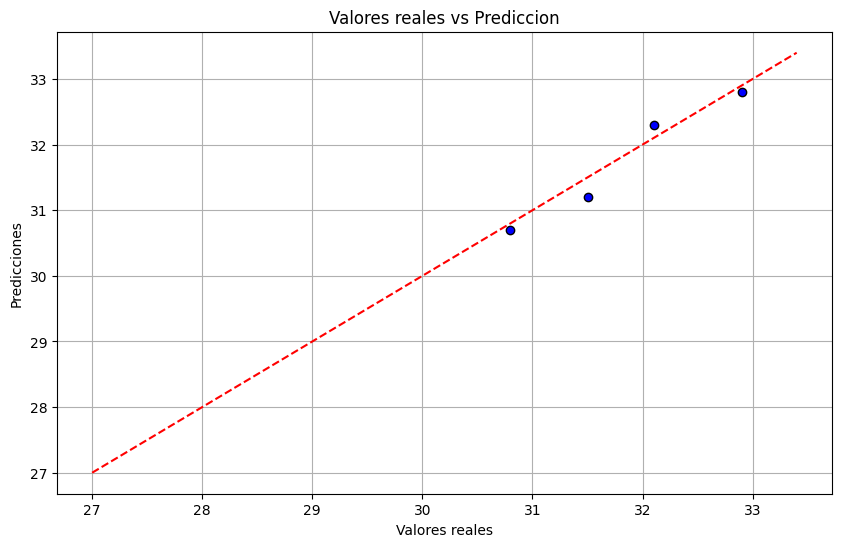

In [ ]:
# grafica resultados reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = "blue", edgecolor = "black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Prediccion')
plt.grid(True)

4. Interpretacion del arbol

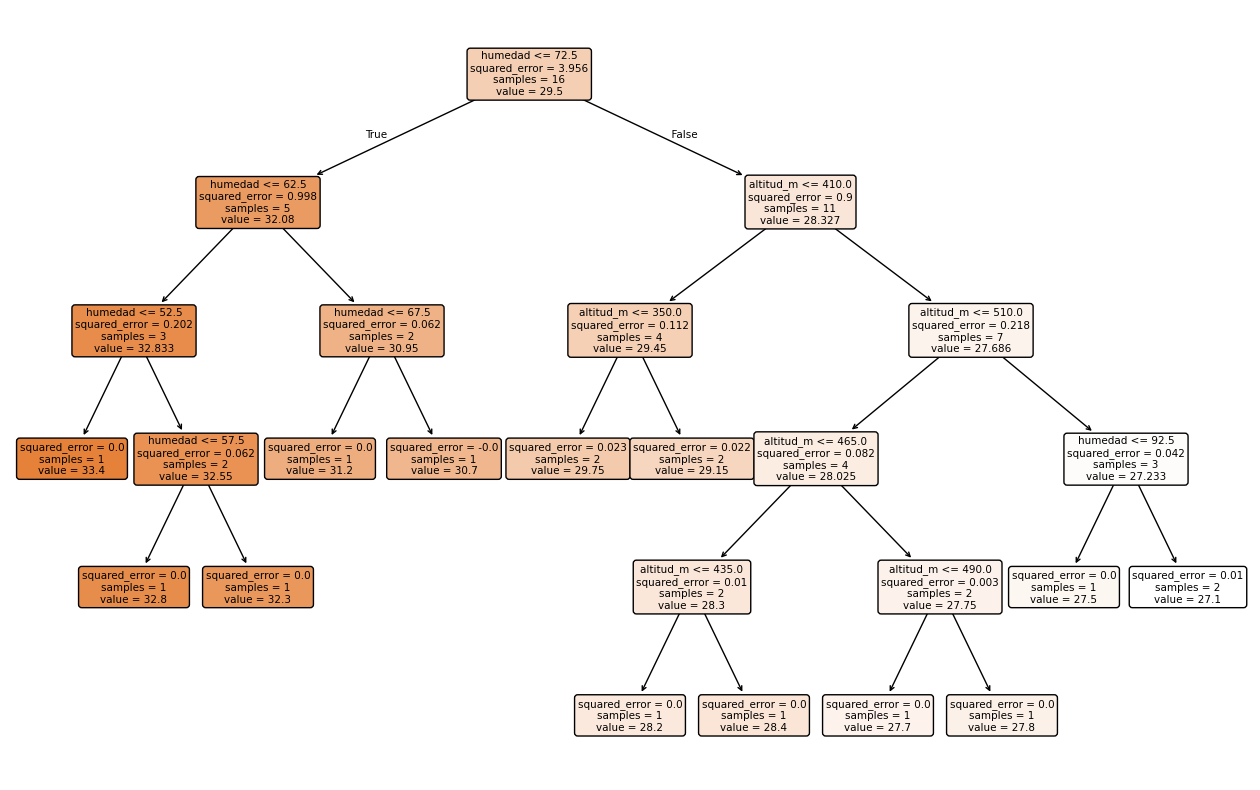

In [ ]:
# graficar arbol
plt.figure(figsize=(16, 10))
plot_tree(modelo, feature_names = x.columns, filled=True, rounded=True)
plt.show()

- Observando el arbol de decision se puede ver que la primer celda que divide es de humedad por un nodo y por el otro se ve la altitud.
- Tiene sentido, la humedad del aire tiene un impacto en la temperatura, cuando la humedad es mayor se puede sentir una temperatura mas elevada, aunque se pueden asociar diferentes factores como el clima, la altitud, viento, pero en este caso se evidencia que el primer divisor fue humedad por lo que es el factor que mas influye.

5. Prediccion final

In [ ]:
nueva_temp = pd.DataFrame({
    "humedad": [70],
    "velocidad_viento": [10],
    "altitud_m": [500]
})
prediccion = modelo.predict(nueva_temp)
print(f"La temperatura maxima es de {prediccion[0]} grados celcius")

La temperatura maxima es de 30.7 grados celcius


-  El valor predicho tiene choerencia con el conjunto de datos, si vemos el valor mas acercado tiene una humedad de 70 - 75 una altitud de entre 200 - 550 y una velocidad del viento de entre 8 - 10, son bastante cercanos a esta temperatura con valores de entre 30.7 - 29 grados, por lo que la prediccion fue bastante acertada.

In [ ]:
df.head(10)

,humedad,altitud_m,velocidad_viento,temp_max_c
0,60,100,5,32.1
1,65,150,6,31.5
2,70,200,8,30.7
3,75,300,9,29.9
4,80,400,10,29.0
5,85,450,11,28.4
6,90,500,12,27.8
7,95,550,13,27.2
8,50,80,4,33.4
9,55,120,5,32.8


## SECCION FINAL - Analisis comparativo




*   El modelo que presento un mauor rendimiento en R2 o mas elevado fue el segundo -> Estimacion de salarios segun experiencia, quien obtuvo un R2 de 0.98, lo que explica el 98% de variabilidad en el salario. El ejercicio 1 -> consumo de combustible y el ejercicio 3 -> temperatura maxima fue de 94% aproximadamente.
*   En el ejercicio 2 y 1 fue mas facil identificar las relaciones, en ambos los graficos mostraban una tendencia clara y casi lineal entrea variables predictoras y el objetivo.


*   Este parametro (max_depth) controla las rutas maximas o profundidad maxima en el arbol de decisiones, aumentarlo permite que este sea mas complejo, esto puede llevar a un sobreajuste donde el modelo funciona bien en los datos de entrenamiento pero no generaliza los datos nuevos. esta funciones crucial para equilibrar el ajuste de datos de entrenamiento y la capacidad de generalizacion del modelo.
*   Ventajas:
      * Entender e interpretar los arboles de decision es relativamente facil cuando estos no son demasiado profundos, esto ayuda a comprender las decisiones de prediccion
      * Se puede trabjar con relacioens no lineales, a diferencia de una regresion simple, los arboles pueden modelar relaciones complejas y no lineales entre variables predictoras y la objetivo.
* Limitaciones
    *    Los arboles pueden volverse muy complejos y sobreajustarse a los datos de entreamiento.
    * Pequeñas variaciones en los datos de entrenamiento puede hacer arboles de decisiones muy diferentes.
    * Predecir por arbol de decision es una funcion por pasos, esto quiere decir que solo puede predecir un conjunto finito de valores, lo que puede ser una limitacion si se necesita una prediccion continua mas suave.






